# Keras Regression

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Set up

### Load libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Do we have any missing data?

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing data

In [6]:
df.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.007547,0.086549,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,0.234292,0.766390,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


## Exploratory Data Analysis

Let's plot the distribution of the response variable first

<Figure size 1200x600 with 0 Axes>

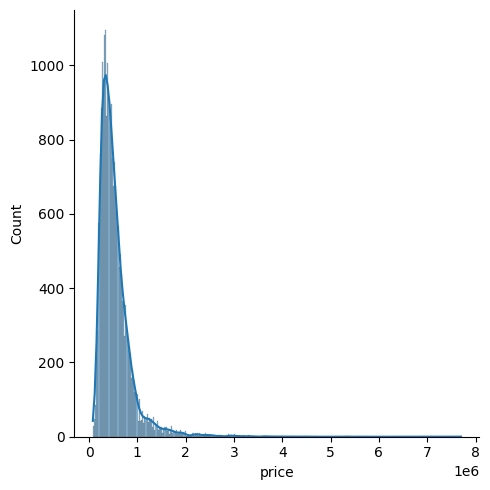

In [7]:
plt.figure(figsize=(12,6))
sns.displot(df['price'], kde = True)
plt.tight_layout()

We can see we have a few extreme outliers, dragging the tail up to very high prices. A potential solution here is to drop outliers to try to predict more realistic houses.

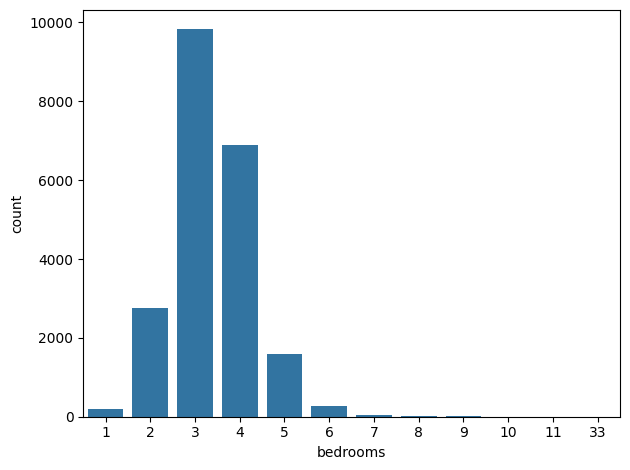

In [8]:
sns.countplot(data = df, x = 'bedrooms')
plt.tight_layout()

We can see here again where those outliers might be coming from. We have houses with 33 bedrooms.

We can also compare some correlations against the response

In [9]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

We see some high correlation features. Let's explore some of them.

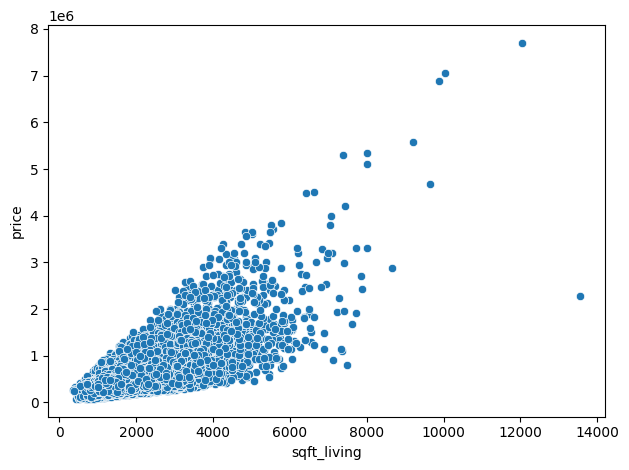

In [10]:
sns.scatterplot(data = df, x = 'sqft_living', y = 'price')
plt.tight_layout()

We can start to appreciate a strong linear relationship between Square footage of the apartments interior living space and the hourse price

We can explore aswell the distribution of price within a certain feature, which might gives us some understanding of the range of prices based on single features. For example, number of bedrooms.

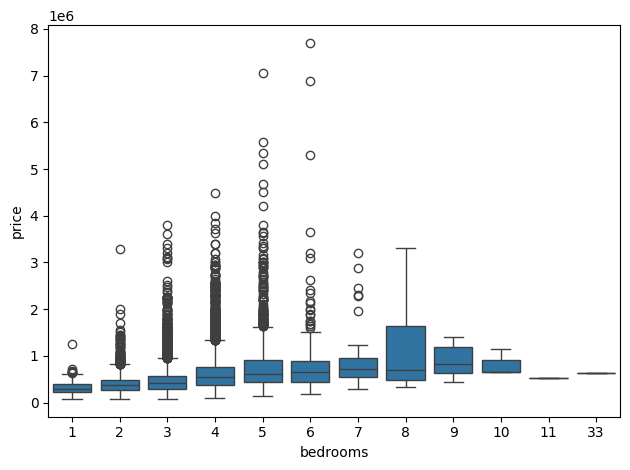

In [11]:
sns.boxplot(x = 'bedrooms', y = 'price', data = df)
plt.tight_layout()

We can see that there is quite a bit of variation among houses with bedrooms between 3 and 7. This makes sense because this is our highest density of houses as we saw in the plot above. Thus, this variability will likely be accounted for by some other features that relate to the value of the pro

Next, let's explore some geographical relationship between price and location by plotting longitude and latitude and the geographical distribution of prices.

Text(0.5, 1.0, 'Geographic density of houses')

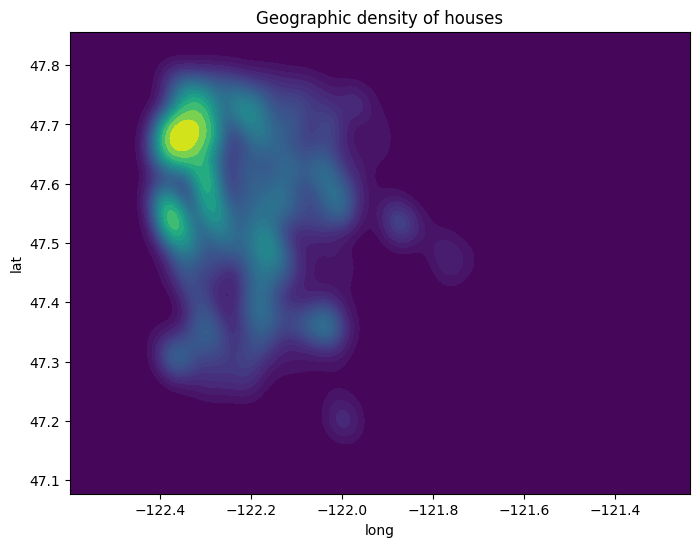

In [12]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df, x='long', y='lat',
    fill=True, 
    cmap='viridis', 
    thresh=0,
    levels=30
)
plt.title("Geographic density of houses")

we can see that the density of houses increases towards north-west

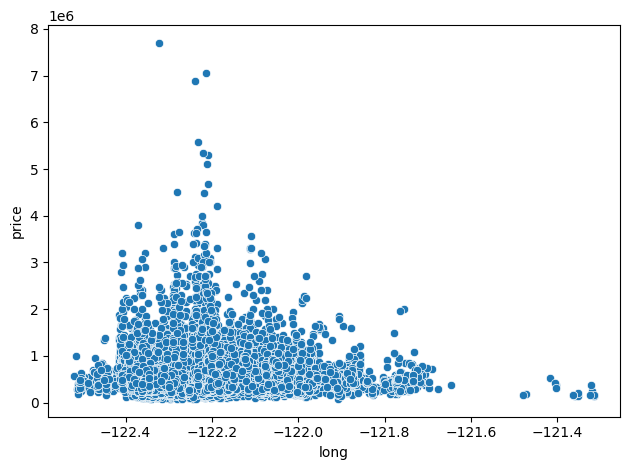

In [13]:
sns.scatterplot(x = 'long', y = 'price', data = df)
plt.tight_layout()

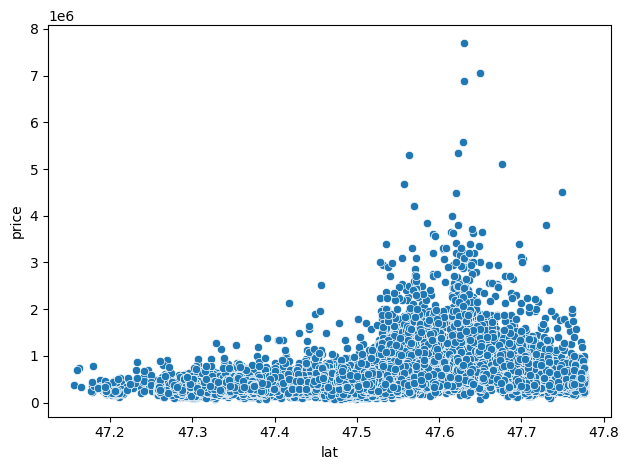

In [14]:
sns.scatterplot(x = 'lat', y = 'price', data = df)
plt.tight_layout()

When looking at the scatterplot across lat and long we see a peak that corresponds to the core of the density plot above. So, not only a higher density, but also the high-price houses are concentrated in that area.

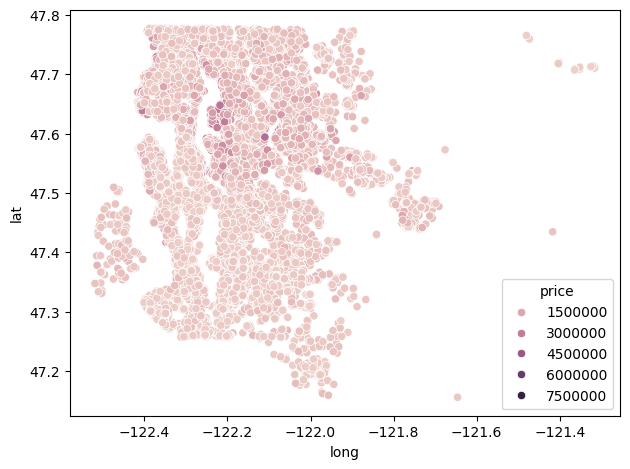

In [15]:
sns.scatterplot(x='long', y = 'lat', data = df, hue = 'price')
plt.tight_layout()

We can see that the high-price houses are concentrated in an area, that is actually a bit south of the high-density geographical cluster we found above.

To make this clearer, we can filter out the outliers we mentioned above, which we could make a conservative cut-off at around three millions. So, lets filter out the top 1% of all houses.

In [16]:
len(df)*0.01

215.97

In [17]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:] # this number is informed by the 1% above

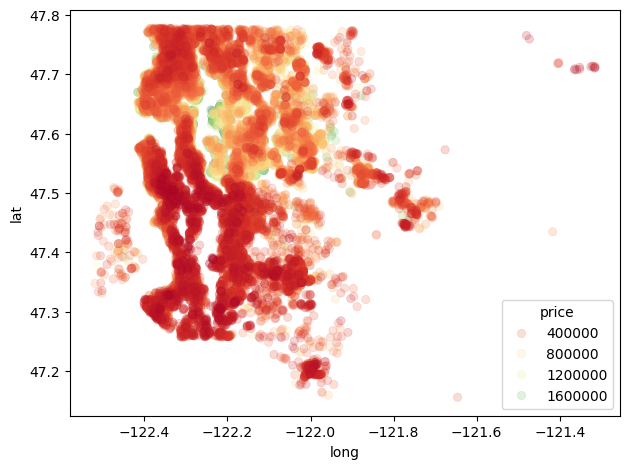

In [18]:
sns.scatterplot(x='long', y = 'lat', data = non_top_1_perc,
               edgecolor = None, alpha = 0.2, palette = 'RdYlGn', hue = 'price')
plt.tight_layout()

Now we are filtering through the noise created by those outliers. We can see now that more expensive houses tend to be closer to the water (looking at some information about where the data is from). This makes sense - waterfront properties tend to be more expensive. But also see the potential bias of visualisation perspective and outliers.  

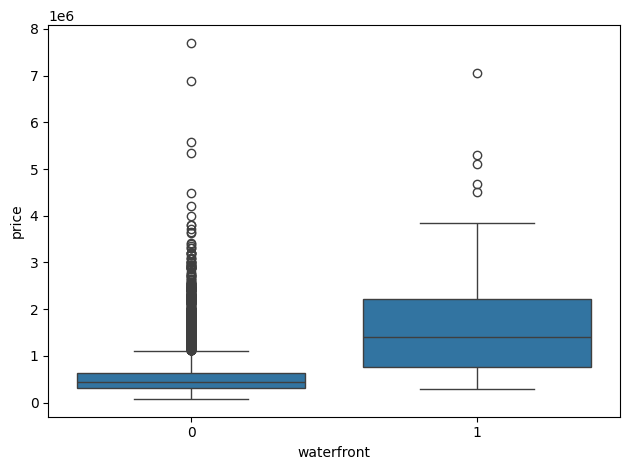

In [19]:
sns.boxplot(x = 'waterfront',y = 'price',data = df)
plt.tight_layout()

Again, just confirming the patterns with some features of the data I did not consider previously but the EDA is unlocking.

## Feature engineering

In [20]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


`id` is not going to be a useful feature.

In [21]:
df = df.drop('id', axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

`date` seems to be the only feature for which the data type looks incorrect - so I will convert it to a explicit date format

In [23]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

Now that we have date in the proper format, we can extract some information out of it. For example, month and year.

In [24]:
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


We can now further explore these new features.

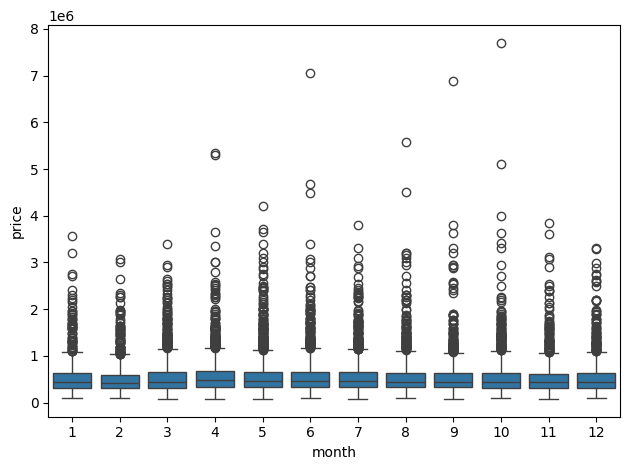

In [25]:
sns.boxplot(x = 'month', y = 'price', data = df)
plt.tight_layout()

Outliers are truly obscuring any potential pattern, so let's explore the numbers instead.

In [26]:
monthly_price = pd.DataFrame(df.groupby('month')['price'].mean()).reset_index()
monthly_price

,month,price
0,1,525963.251534
1,2,508520.051323
2,3,544057.683200
3,4,562215.615074
4,5,550849.746893
5,6,557534.318182
6,7,544892.161013
7,8,536655.212481
8,9,529723.517787
9,10,539439.447228


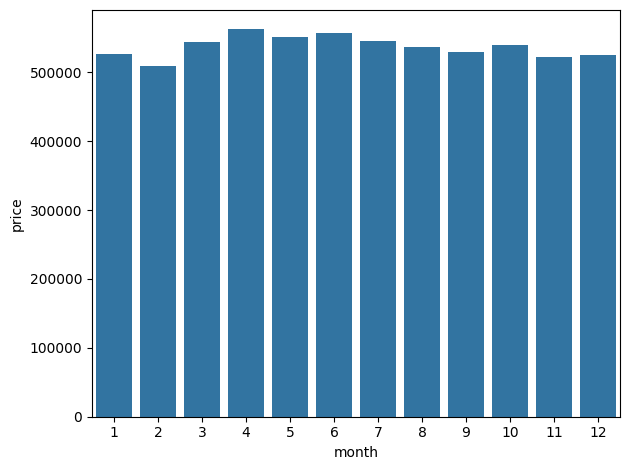

In [27]:
sns.barplot(x = 'month', y = 'price', data = monthly_price, errorbar=None)
plt.tight_layout()

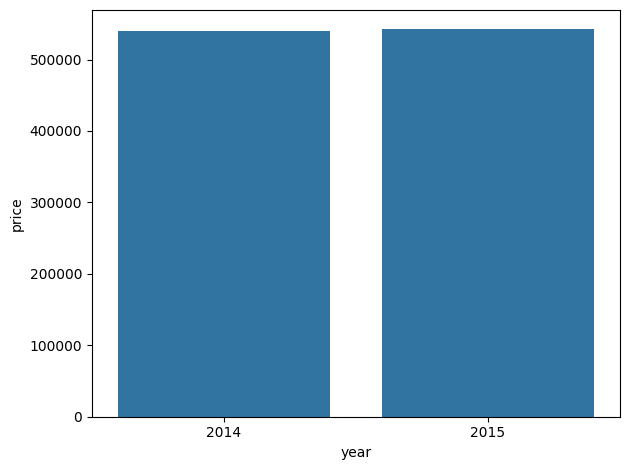

In [28]:
yearly_price = pd.DataFrame(df.groupby('year')['price'].mean()).reset_index()
sns.barplot(x = 'year', y = 'price', data = yearly_price, errorbar=None)
plt.tight_layout()

Not much can be drawn from 2 years of data but 2015 seems to be slightly higher than 2014.

As we have extracted the useful information from `date` already, we can now drop the column and keep `year` and `month` for the model.

In [29]:
df = df.drop('date',axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


Something to note as well is that the column `zipcode` is a numeric, and the model might then treat it as if increasing or decreasing has a meaning, which it does not (at least regarding the scalability of the variable). Let's explore if it would be worth keeping `zipcode` as some sort of categorical variable.

In [30]:
len(df['zipcode'].value_counts())

70

There are 70 different zipcodes, so it is probably not worth trying to hot encode this variable for the model. We will drop it.

In [31]:
df = df.drop('zipcode', axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


Another possible conflicting feature is `yr_renovated`, which mixes years with zeroes. Zero means no renovated. It might make more sense to turn this variable into a binary category: renovated or not renovated. However, it is also true that higher year (more recent) renovation might be more correlated to a higher price than renovations that happened 60 years ago. So we might want to take advantage of this by leaving the variable as it is, but interpreted as an increasing number that indicates how recent the renovation was.

In [32]:
# df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

We can take the same approach idea for `sqtf_basement`, with zeroes just relating to 'no basement' and the higher the number the more appealing the house is and therefore higher price expected. But again, the variables in this variable, as it was for `yr_renovated` do not mean the same thing throught the feature, so always be careful with interpreting these semi-continuous variables in which a value takes the role of a category.

## Pre-processing

### Train/test split

In [56]:
X=df.drop('price', axis = 1).values #important to pass the values for tensorflow
y= df['price'].values

In [37]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating and fitting the model

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
X_train.shape

(15117, 19)

We have 19 features coming in, which makes sense to have 19 neuros in your layer.

In [55]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [57]:
model.fit(x = X_train, 
          y = y_train, 
          validation_data=(X_test, y_test),
          batch_size = 128, # batches are usually passed in powers of 2
          epochs = 400)

Epoch 1/400


2025-11-10 20:16:42.384154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 430229323776.0000 - val_loss: 418878259200.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 429259423744.0000 - val_loss: 415877070848.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 419036364800.0000 - val_loss: 393845637120.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 373365506048.0000 - val_loss: 318920392704.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 264952938496.0000 - val_loss: 187965751296.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 144169680896.0000 - val_loss: 105041002496.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 102437806080.0000 - val_loss: 96157908992.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 98828058624.0000 - val_loss: 95012118528.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 97551802368.0000 - val_loss: 93767106560.0000
Epoch 10/400
119/119 ━━━━━━━━━━━━━━

### Model evaluation and Predictions

In [59]:
losses = pd.DataFrame(model.history.history)

<Axes: >

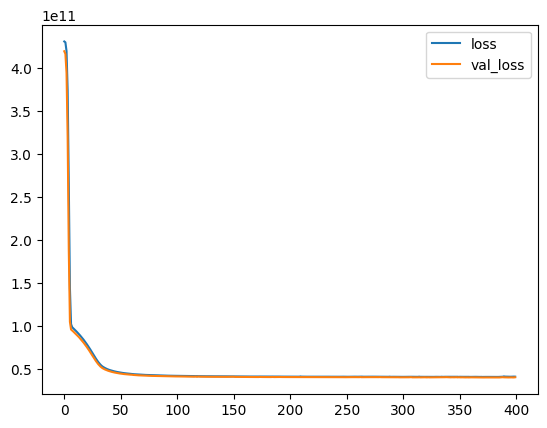

In [60]:
losses.plot()

The training and validation loss curves in this plot indicate that the model learned efficiently and achieved stable convergence. Both losses start at a very high value and rapidly decrease within the first few epochs, then gradually level off as the training progresses, showing that the model successfully minimized the mean squared error without instability or oscillation. The near overlap between the training and validation loss curves suggests that the model generalizes well to unseen data and is not overfitting. Overall, this behavior reflects a well-tuned architecture and optimizer setup, where learning occurs quickly at the beginning and then stabilizes as the model reaches its optimal performance.

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [62]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [81]:
print('================')
print('Model evaluation')
print('================\n')
print(f'Mean squared root error: {np.sqrt(mean_squared_error(y_test, predictions))}\n')
print(f'Mean absoltute error: {mean_absolute_error(y_test, predictions)}\n')
print(f'Explained variance score: {explained_variance_score(y_test, predictions)}\n\n')


from IPython.display import display
summary_df = (
    df["price"]
    .describe()
    .round(2)
    .to_frame(name="Price Summary")
    .reset_index()
    .rename(columns={"index": "Statistic"})
)
print("\n=== Response Variable Summary ===\n")
display(summary_df)

Model evaluation

Mean squared root error: 201864.50862971944

Mean absoltute error: 120069.82278544108

Explained variance score: 0.6927380257149748



=== Response Variable Summary ===



,Statistic,Price Summary
0,count,21597.00
1,mean,540296.57
2,std,367368.14
3,min,78000.00
4,25%,322000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


The model’s evaluation shows a root mean squared error of approximately 201,865, a mean absolute error of about 120,070, and an explained variance score of 0.69. Together, these results suggest that the neural network captures roughly 69 percent of the variability in housing prices in the test dataset, indicating that it has learned meaningful structure from the data but is still missing some of the underlying complexity. The magnitude of the prediction errors, when compared to the mean house price of around 540,000, represents an average deviation of roughly 22 percent, which is moderate for a model of this type without heavy feature engineering or scaling. The distribution of the response variable highlights a wide price range, from 78,000 to 7.7 million, with a standard deviation of 367,000, reflecting substantial heterogeneity in property values across the dataset. In this context, the model performs reasonably well at predicting general pricing patterns across the market, but it likely struggles with extreme or atypical cases at both ends of the price spectrum. Further improvement could come from incorporating more informative predictors, applying transformations such as a log scale on price, and fine-tuning model architecture or regularization to capture additional non-linear relationships and reduce residual variance.

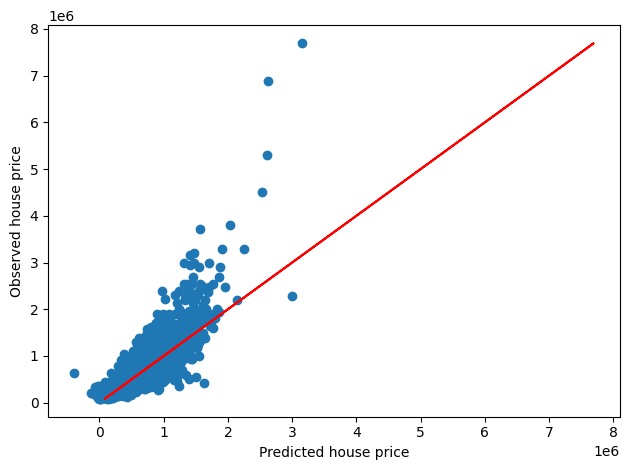

In [85]:
plt.scatter(predictions, y_test)
plt.plot(y_test, y_test,'r')
plt.xlabel('Predicted house price')
plt.ylabel('Observed house price')
plt.tight_layout()

This diagnostic plot compares predicted house prices on the x-axis with the observed house prices on the y-axis, where the red line represents perfect one-to-one agreement. Most data points fall close to the line for lower and mid-range prices, indicating that the model captures general pricing patterns reasonably well in that range. However, as prices increase, the points increasingly fall above the red line, showing that the model underestimates high-value properties—its predictions are systematically lower than the true prices. This widening gap at the upper end reflects a compression of the model’s output range and growing prediction error for expensive homes. The pattern suggests that the model performs adequately for common, moderately priced properties but lacks flexibility or sufficient information to represent the dynamics driving luxury or extreme price segments. These results point to potential improvements, such as applying a log transformation to the target variable to reduce skewness, using a more robust loss function like mean absolute error or Huber loss to balance the influence of outliers, reweighting rare high-priced examples, or enriching the input features with additional predictors that better capture high-end market drivers.

### Prediction test

In [89]:
single_house_features = df.drop('price', axis = 1).iloc[0]
single_house_features

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [90]:
single_house_features.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  1.00000e+01,  2.01400e+03]])

In [91]:
single_house_features = scaler.transform(single_house_features.values.reshape(-1,19))

In [101]:
single_house_pred = model.predict(single_house_features)[0,0]
single_house_true = df["price"].iloc[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [104]:
print('=== Small prediction test ===\n')
print(f'True price of the new house was {single_house_true} and the predicted price by the model is {single_house_pred}\n')
print(f'We overpredicted the house price by ${single_house_pred - single_house_true}')

=== Small prediction test ===

True price of the new house was 221900.0 and the predicted price by the model is 258177.046875

We overpredicted the house price by $36277.046875


### Model optimisation

An effective approach would be for now to remove the top 1% house prices and create a robust model that can predict 99% of the market.

In [113]:
threshold = df['price'].quantile(0.99)

# Filter out the top 1% most expensive properties
df_filtered = df[df['price'] <= threshold].copy()

# Check how much data was removed
print(f"Removed {len(df) - len(df_filtered)} rows ({100 * (len(df) - len(df_filtered)) / len(df):.2f}% of data)")

# Separate features and target for the filtered dataset
X = df_filtered.drop('price', axis=1).values
y = df_filtered['price'].values

Removed 214 rows (0.99% of data)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [116]:
model.fit(x = X_train, 
          y = y_train, 
          validation_data=(X_test, y_test),
          batch_size = 128, # batches are usually passed in powers of 2
          epochs = 400)

Epoch 1/400
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 349982457856.0000 - val_loss: 350633164800.0000
Epoch 2/400
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 349110042624.0000 - val_loss: 347960049664.0000
Epoch 3/400
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 339881099264.0000 - val_loss: 327934705664.0000
Epoch 4/400
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 297646227456.0000 - val_loss: 257766572032.0000
Epoch 5/400
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 196662984704.0000 - val_loss: 134992232448.0000
Epoch 6/400
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 88793382912.0000 - val_loss: 63510929408.0000
Epoch 7/400
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 56161656832.0000 - val_loss: 56850321408.0000
Epoch 8/400
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 53981564928.0000 - val_loss: 56059359232.0000
Epoch 9/400
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 53253451776.0000 - val_loss: 55304044544.0000
Epoch 10/400
117/117 ━━━━━

<Axes: >

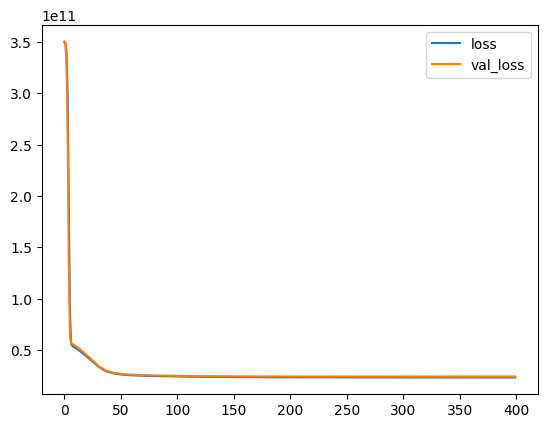

In [118]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [119]:
predictions = model.predict(X_test)
print('================')
print('Model evaluation')
print('================\n')
print(f'Mean squared root error: {np.sqrt(mean_squared_error(y_test, predictions))}\n')
print(f'Mean absoltute error: {mean_absolute_error(y_test, predictions)}\n')
print(f'Explained variance score: {explained_variance_score(y_test, predictions)}\n\n')

summary_df = (
    df_filtered["price"]
    .describe()
    .round(2)
    .to_frame(name="Price Summary")
    .reset_index()
    .rename(columns={"index": "Statistic"})
)
print("\n=== Response Variable Summary ===\n")
display(summary_df)

201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   
Model evaluation

Mean squared root error: 155164.37285109592

Mean absoltute error: 108325.92223328065

Explained variance score: 0.7143007564367179



=== Response Variable Summary ===



,Statistic,Price Summary
0,count,21383.00
1,mean,518503.25
2,std,285275.15
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,635000.00
7,max,1970000.00


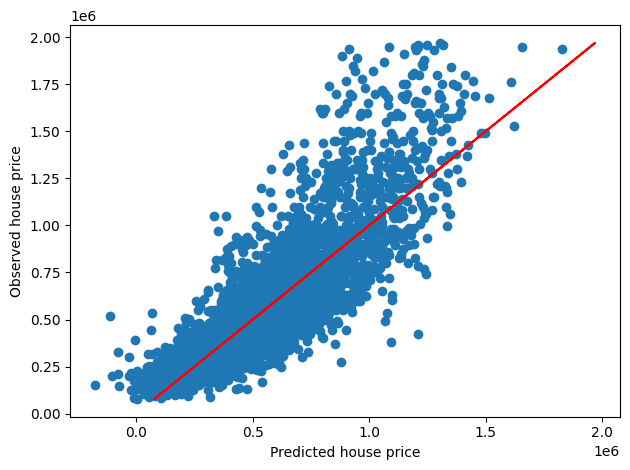

In [120]:
plt.scatter(predictions, y_test)
plt.plot(y_test, y_test,'r')
plt.xlabel('Predicted house price')
plt.ylabel('Observed house price')
plt.tight_layout()

In [121]:
single_house_features = df_filtered.drop('price', axis = 1).iloc[0]
single_house_features.values.reshape(-1,19)
single_house_features = scaler.transform(single_house_features.values.reshape(-1,19))
single_house_pred = model.predict(single_house_features)[0,0]
single_house_true = df_filtered["price"].iloc[0]
print('=== Small prediction test ===\n')
print(f'True price of the new house was {single_house_true} and the predicted price by the model is {single_house_pred}\n')
print(f'We overpredicted the house price by ${single_house_pred - single_house_true}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
=== Small prediction test ===

True price of the new house was 221900.0 and the predicted price by the model is 268068.4375

We overpredicted the house price by $46168.4375


This new model, trained after removing the top 1 percent of the most expensive houses, shows a clear and quantifiable improvement in predictive performance and stability compared to the original full-dataset model. The loss and validation-loss curves both decline sharply at the start and then flatten smoothly, indicating efficient convergence with no evidence of overfitting. The model’s root-mean-squared error dropped from roughly 201 ,865 to 155 ,164, and the mean absolute error decreased from 120 ,070 to 108 ,326 — about a 20 percent reduction in typical prediction error. The explained-variance score rose slightly from 0.69 to 0.71, confirming that the model now captures a greater share of the variability in house prices.

The distribution of prices in the trimmed dataset (mean ≈ 518 k, max ≈ 1.97 M instead of 7.7 M) demonstrates that the removed outliers previously inflated both variance and error magnitude. By excluding them, the model became more sensitive to the patterns that dominate the mainstream housing market rather than being distorted by a handful of extreme luxury properties. The diagnostic plot reinforces this: predictions now cluster more tightly around the 1:1 line, with fewer large deviations at the upper end, though slight underprediction of the highest remaining prices still persists.

In summary, trimming the top 1 percent reduced noise, stabilized training, and yielded more reliable and generalizable predictions for typical homes. The trade-off is that the model no longer represents the luxury segment, but for most applications—market-wide price estimation, risk modeling, or policy analysis—the trimmed model is a more accurate and robust predictor.

# === End of the Project!